# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [1]:
import pandas as pd
data = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(data,index=['a','b','c'],columns=['A','B','C'])
df

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9


In [ ]:
for x in df[[],:]

In [7]:
df.loc[['a'],['A']]

,A
a,1


loc method select by lable, name

In [6]:
df.iloc[:,[0]]

,A
a,1
b,4
c,7


iloc meethod select by numerical index

In [5]:
df[1:2]

,A,B,C
b,4,5,6


use [] to select the element in dataframe

__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [5]:
import numpy as np
x=np.array([1, 2, 3]) 
x[-1]


3

in NumPy array it select the last element

In [11]:
alist=['a','b','c']
alist[-1]

'c'

in list it select the last element

In [19]:
df[:-1]

,A,B,C
a,1,2,3
b,4,5,6


in dataframe it select without the last element

__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [23]:
import pandas as pd
import numpy as np
a = pd.DataFrame([1,2],## create a 2data frame with index A B
                 index=list('AB'))
b = pd.DataFrame([1,2,3],# create a  frame with index A B C
                 index=list('ABC'))
c = a+b
c

,0
A,2.0
B,4.0
C,NaN


It alignment base on the index or lable if they are match, otherwise out put NaN.

__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

In [26]:
df.reindex(['c','b'])

,A,B,C
c,7,8,9
b,4,5,6


reindex can use to select rows or coloums. when nothing match, will replace the value to NaN or defult

In [40]:
df.reset_index(inplace=True)
df

,level_0,index,A,B,C
0,0,a,1,2,3
1,1,b,4,5,6
2,2,c,7,8,9


add a new coloum to a data frame

## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

In [10]:
def many_fish(dirc):
    xls = pd.ExcelFile(dirc)
    fish=pd.read_excel(xls, sheet_name="FishShellfish_M_Yearly-Full",skiprows = 1)###safe dataframe to fish

    fish1=fish.iloc[:14, 1:33]#####the datafram by volume
    fish1.columns.values[0] = 'kind'
    fish1 = fish1.set_index('kind')
    fish1 = fish1.stack()
    fish1.index = fish1.index.rename('year',level=1)
    fish1.name = 'Volume_1000lb'
    fish1 = fish1.reset_index()
    fish1[['fish_kind','format']]= fish1['kind'].str.split(',',n=1,expand=True)###separated by ","
    fish1=fish1.reindex(columns=['fish_kind','format','year','Volume_1000lb'])
    print(fish1)

    fish2=fish.iloc[14:30, 1:33]#####the datafram by value
    fish2.columns.values[0] = 'kind'
    fish2 = fish2.set_index('kind')
    fish2 = fish2.stack()
    fish2.index = fish2.index.rename('year',level=1)
    fish2.name = 'Value_$1000'
    fish2 = fish2.reset_index()
    fish2[['fish_kind','format']]= fish2['kind'].str.split(',',n=1,expand=True) ###separated by ","
    fish2=fish2.reindex(columns=['fish_kind','format','year', 'Value_$1000'])
    print(fish2)

In [14]:
dir="C:/Users/Administrator.SC-201301200557/Downloads/AquacultureTradeFull.xls"
many_fish(dir)

       fish_kind             format        year  Volume_1000lb
0          Trout   fresh and frozen        1989    1467.892443
1          Trout   fresh and frozen        1990    5898.067124
2          Trout   fresh and frozen        1991    3866.117733
3          Trout   fresh and frozen        1992    6200.029791
4          Trout   fresh and frozen        1993    4744.615508
5          Trout   fresh and frozen        1994    3880.765242
6          Trout   fresh and frozen        1995    4077.122105
7          Trout   fresh and frozen        1996    4549.389616
8          Trout   fresh and frozen        1997    5401.612705
9          Trout   fresh and frozen        1998    5669.103902
10         Trout   fresh and frozen        1999    5340.006748
11         Trout   fresh and frozen        2000    7094.733741
12         Trout   fresh and frozen        2001    7293.528916
13         Trout   fresh and frozen        2002    9752.376902
14         Trout   fresh and frozen        2003    9044

__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

In [16]:
xls = pd.ExcelFile("C:/Users/Administrator.SC-201301200557/Downloads/AquacultureTradeFull.xls")
fish=pd.read_excel(xls, sheet_name="FishShellfish_M_Yearly-Full",skiprows = 1)
fish.columns.values[1] = 'fish'
fish=fish.reindex(columns=['fish','2007'])
fish3=fish.iloc[0:14,:]
fish4=fish.iloc[14:30,:]
fish3.sort_values(by='2007', ascending=False)

,fish,2007
8,"Shrimp, frozen",912952.947586
7,Tilapia 3/,383153.089586
9,"Shrimp, fresh and prepared 4/",317735.358617
5,"Atlantic salmon, fillets",265077.666728
1,"Atlantic salmon, fresh",178777.654762
13,Scallops 5/,56626.884520
11,Mussels 5/,53091.446859
4,"Pacific salmon, frozen 1/",52642.832737
12,Clams 5/,30617.823405
6,"Salmon, canned and prepared 2/",30469.716899


In [237]:
fish4=fish.iloc[14:30,:]
fish4.sort_values(by='2007', ascending=False)

,fish,2007
18,"Shrimp, frozen",2967743.467
19,"Shrimp, fresh and prepared 4/",943246.335
15,"Atlantic salmon, fillets",934970.234
17,Tilapia 3/,559892.933
22,"Atlantic salmon, fresh",456732.880
27,Scallops 5/,236756.361
14,"Pacific salmon, frozen 1/",110811.730
16,"Salmon, canned and prepared 2/",104961.650
25,Mussels 5/,67136.892
24,Oysters 5/,53913.118


Shrimp have the largest import amount no matter in pound or money.

__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

In [238]:
fish=pd.read_excel(xls, sheet_name="FishShellfish_X_Yearly-Full",skiprows = 1)
fish.columns.values[1] = 'fish'
fish=fish.reindex(columns=['fish','2007'])
fish5=fish.iloc[0:12,:]
fish5.sort_values(by='2007', ascending=False)

,fish,2007
4,"Pacific salmon, frozen 1/",300385.779346
5,"Salmon, canned and prepared 2/",139103.197884
11,Scallops 4/,23907.571331
2,"Pacific salmon, fresh 1/",15777.516234
7,"Shrimp, fresh and prepared 3/",14152.855325
10,Clams 4/,12469.754296
6,"Shrimp, frozen",8722.752290
1,"Atlantic salmon, fresh",7303.090362
8,Oysters 4/,6230.905522
9,Mussels 4/,1895.591316


In [239]:
fish6=fish.iloc[12:23,:]
fish6.sort_values(by='2007', ascending=False)

,fish,2007
16,"Pacific salmon, frozen 1/",414483.153
17,"Salmon, canned and prepared 2/",318818.630
19,"Shrimp, fresh and prepared 3/",55745.431
22,Clams 4/,41064.432
18,"Shrimp, frozen",34253.356
14,"Pacific salmon, fresh 1/",27939.199
20,Oysters 4/,17308.134
13,"Atlantic salmon, fresh",14781.004
21,Mussels 4/,3269.918
12,"Trout, fresh and frozen",1753.990


Pacific salmon is the most export seafood. All fish American export, American also import.

__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

In [17]:
###calculate by quantity
xls = pd.ExcelFile("C:/Users/Administrator.SC-201301200557/Downloads/AquacultureTradeFull.xls")
shrimp=pd.read_excel(xls, sheet_name="Shrimp_Q_Yearly-Full",skiprows = 2)
shp=shrimp.iloc[:24, [2] +[-3]+[-2]+[-1]]###geet thee columns we need
shp['sum']=shp.iloc[:,-1]+shp.iloc[:,-2]+shp.iloc[:,-3]###add sum of last 3 columns
shp.sort_values(by='sum', ascending=False)###sort the column "sum"

,Unnamed: 2,2017,Jan-Oct 17,Jan-Oct 18,sum
2,India,471734.570061,385450.532786,449026.233731,1.306211e+06
3,Indonesia,260272.340339,212026.174234,240918.391498,7.132169e+05
1,Ecuador,158315.420395,134391.122597,143957.495541,4.366640e+05
0,Thailand,165282.568252,133576.574293,86533.721739,3.853929e+05
5,Vietnam,123659.018291,102069.953119,104599.922210,3.303289e+05
4,China (Mainland),101188.675316,83946.006984,88007.050780,2.731417e+05
6,Mexico,62761.659704,39869.757728,33788.182277,1.364196e+05
20,Argentina,27671.535700,22063.427075,19504.213672,6.923918e+04
14,Peru,21935.942603,18525.925887,20200.922726,6.066279e+04
10,Guyana,20478.200239,17715.035051,13541.260113,5.173450e+04


India, Indonesia, Ecuador,Thailand,Vietnam are the first 5 shrimp export county sort in quantity 

In [244]:
###calculate by value
shrimp=pd.read_excel(xls, sheet_name="Shrimp_V_Yearly-Full",skiprows = 1)
shp1=shrimp.iloc[:24, [2] +[-3]+[-2]+[-1]] ###geet thee columns we need
shp1['sum']=shp.iloc[:,-1]+shp.iloc[:,-2]+shp.iloc[:,-3] ###add sum of last 3 columns
shp1.sort_values(by='sum', ascending=False)###sort the column "sum"

,Unnamed: 2,2017,Jan-Oct 17,Jan-Oct 18,sum
1,India,2170546.504,1763131.316,1824741.471,9346292.078
2,Indonesia,1185911.325,964079.341,1008651.707,5131373.421
0,Thailand,811536.118,654705.956,432935.376,2986818.782
4,Vietnam,633840.708,515987.857,506672.522,2679161.466
3,Ecuador,574013.353,485953.586,453493.235,2452906.995
6,China (Mainland),334360.797,277554.661,272254.862,1433979.843
5,Mexico,337137.297,217820.897,178341.838,1129462.767
20,Argentina,120672.775,95454.685,96544.199,504670.543
12,Peru,90550.458,77142.437,77201.005,399237.342
14,Guyana,56426.908,49094.781,36193.230,227002.930


India, Indonesia, Thailand,Vietnam	,Ecuador are the first 5 shrimp export county sort in valum.

In [113]:
xls = pd.ExcelFile("C:/Users/Administrator.SC-201301200557/Downloads/AquacultureTradeFull.xls")
shrimp=pd.read_excel(xls, sheet_name="Shrimp_V_Yearly-Full",skiprows = 1)
shp=shrimp.iloc[:50, 2:30]###get the row and columns we neeeed
i=1
year=list(shp)
top5=[]
while i < len(list(shp)):########collect top 5 countrys from each year
    top5=list(set(top5) | set(shp.sort_values(by=year[i], ascending=False).iloc[:5,0])) 
    i+=1
top5
shp = shp.set_index(shp.columns[0])
shp=shp.reindex(top5)
shp.loc['Vietnam'] = shp.loc['Vietnam'].fillna(0)
shp = shp.stack()
shp = shp.reset_index()
shp.columns=["country", "year" ,"imported"]

In [108]:
shp

,country,year,imported
0,Indonesia,1989,51932.861
1,Indonesia,1990,75257.235
2,Indonesia,1991,105823.200
3,Indonesia,1992,121794.464
4,Indonesia,1993,110444.977
5,Indonesia,1994,101960.882
6,Indonesia,1995,58572.540
7,Indonesia,1996,110710.539
8,Indonesia,1997,161614.915
9,Indonesia,1998,188738.670


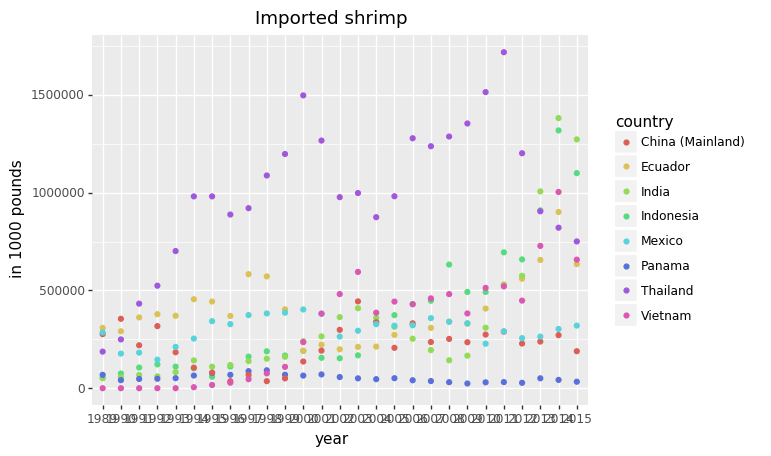

<ggplot: (-9223372036840887208)>

In [125]:
from plotnine import *
(
    ggplot(shp, aes(x = "year", y = "imported", color = "country",group=1)) + geom_point()
    + labs(title = "Imported shrimp", y = "in 1000 pounds")
)